In [26]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sb
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

from sklearn.cross_validation import cross_val_score
%matplotlib inline


#Reading in our data and checking the first 10 rows
medical_data=pd.read_csv('KaggleV2-May-2016.csv',header=0,parse_dates=['ScheduledDay','AppointmentDay'],na_values='',names=['PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','Age','Neighbourhood','Scholarship','Hypertension','Diabetes','Alcoholism','Disabled','SMS Received','No-show' ])
print(medical_data.head(10))

      PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   62   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   56   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   62   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31     2016-04-29    8   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   56   
5  9.598513e+13        5626772      F 2016-04-27 08:36:51     2016-04-29   76   
6  7.336882e+14        5630279      F 2016-04-27 15:05:12     2016-04-29   23   
7  3.449833e+12        5630575      F 2016-04-27 15:39:58     2016-04-29   39   
8  5.639473e+13        5638447      F 2016-04-29 08:02:16     2016-04-29   21   
9  7.812456e+13        5629123      F 2016-04-27 12:48:25     2016-04-29   19   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0  

In [27]:
#Making sure our variables are the correct data type
print(medical_data.dtypes)

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Disabled                   int64
SMS Received               int64
No-show                   object
dtype: object


In [28]:
#Creating dictionary that holds the mapping
show_mapping={'No':0,'Yes':1}
#Using the replace function to replace our strings with integers
medical_data=medical_data.replace({'No-show': show_mapping})

#Checking we have successfully changed our variable
print(medical_data['No-show'].head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
Name: No-show, dtype: int64


In [29]:
# Creating a deepcopy of the data so changes in this copy will not affect the original dataframe
medical_data_copy=pd.DataFrame.copy(medical_data)

regions=medical_data_copy['Neighbourhood'].unique()
print(len(regions))
numeric_val=range(0,81)
my_dict_neigh=dict(zip(regions,numeric_val))
print(my_dict_neigh)


#Using the replace function to replace our strings with integers
medical_data_copy=medical_data_copy.replace({'Neighbourhood': my_dict_neigh})

81
{'JARDIM DA PENHA': 0, 'MATA DA PRAIA': 1, 'PONTAL DE CAMBURI': 2, 'REPÚBLICA': 3, 'GOIABEIRAS': 4, 'ANDORINHAS': 5, 'CONQUISTA': 6, 'NOVA PALESTINA': 7, 'DA PENHA': 8, 'TABUAZEIRO': 9, 'BENTO FERREIRA': 10, 'SÃO PEDRO': 11, 'SANTA MARTHA': 12, 'SÃO CRISTÓVÃO': 13, 'MARUÍPE': 14, 'GRANDE VITÓRIA': 15, 'SÃO BENEDITO': 16, 'ILHA DAS CAIEIRAS': 17, 'SANTO ANDRÉ': 18, 'SOLON BORGES': 19, 'BONFIM': 20, 'JARDIM CAMBURI': 21, 'MARIA ORTIZ': 22, 'JABOUR': 23, 'ANTÔNIO HONÓRIO': 24, 'RESISTÊNCIA': 25, 'ILHA DE SANTA MARIA': 26, 'JUCUTUQUARA': 27, 'MONTE BELO': 28, 'MÁRIO CYPRESTE': 29, 'SANTO ANTÔNIO': 30, 'BELA VISTA': 31, 'PRAIA DO SUÁ': 32, 'SANTA HELENA': 33, 'ITARARÉ': 34, 'INHANGUETÁ': 35, 'UNIVERSITÁRIO': 36, 'SÃO JOSÉ': 37, 'REDENÇÃO': 38, 'SANTA CLARA': 39, 'CENTRO': 40, 'PARQUE MOSCOSO': 41, 'DO MOSCOSO': 42, 'SANTOS DUMONT': 43, 'CARATOÍRA': 44, 'ARIOVALDO FAVALESSA': 45, 'ILHA DO FRADE': 46, 'GURIGICA': 47, 'JOANA D´ARC': 48, 'CONSOLAÇÃO': 49, 'PRAIA DO CANTO': 50, 'BOA VISTA': 5

In [22]:
# Create the difference in days variable for our table
medical_data_copy['Difference'] = medical_data_copy['AppointmentDay'].sub(medical_data_copy['ScheduledDay'], axis=0)
medical_data_copy['Difference'] = medical_data_copy['Difference'].astype(dt.timedelta).map(lambda x: np.nan if pd.isnull(x) else x.days)
medical_data_copy['Difference'] = medical_data_copy['Difference']+1

# Create a DV for Gender and Neighbourhoos
gender = pd.get_dummies(medical_data_copy['Gender'],drop_first=False)



# Remove variables that are not needed for the model
medical_data_copy.drop(['AppointmentDay','ScheduledDay','PatientId','AppointmentID','Gender'],axis=1,inplace=True)


# Combine our data with the new DV
medical_dmy = pd.concat([medical_data_copy,gender],axis=1)

# Check the Output
print(medical_dmy.head(10))


AttributeError: type object 'datetime.datetime' has no attribute 'timedelta'

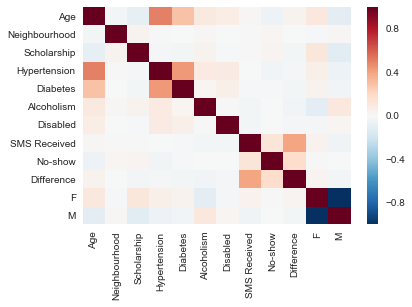

In [40]:
sb.heatmap(medical_dmy.corr())
plt.savefig('Multicollinearity check.png')

In [38]:
# Assigning our independent and dependent variables
X = medical_dmy.loc[:,['Neighbourhood','Age','Difference','F','Scholarship','Alcoholism','Diabetes',]].values
y = medical_dmy.loc[:,'No-show'].values

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Fit a logistic regression model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Predict the DV using the test set
y_pred = LogReg.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Printing our results
print(LogReg.score(X,y))
print(confusion_matrix)

print(classification_report(y_test, y_pred))

0.79400508473
[[26256   275]
 [ 6491   137]]
             precision    recall  f1-score   support

          0       0.80      0.99      0.89     26531
          1       0.33      0.02      0.04      6628

avg / total       0.71      0.80      0.72     33159



In [32]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[ 0.79544015  0.79815435  0.7956211   0.79779245  0.79507826  0.7548177
  0.79724962  0.79480684  0.79786464  0.79676047]
0.792358557727


In [33]:
#null errror rate
y.mean()

0.20193255946510807

In [34]:
# #examine the coefficients
# pd.DataFrame(zip(X.columns.values, np.transpose(LogReg.coef_)))

In [35]:
# predict class labels for the test set
predicted = LogReg.predict(X_test)
print(predicted)

[0 0 0 ..., 0 0 0]


In [36]:
# generate class probabilities
probs = LogReg.predict_proba(X_test)
print(probs)

[[ 0.85824133  0.14175867]
 [ 0.81731744  0.18268256]
 [ 0.67741836  0.32258164]
 ..., 
 [ 0.78988805  0.21011195]
 [ 0.85926804  0.14073196]
 [ 0.80573306  0.19426694]]


In [37]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.795922675593
0.659863652401
